### 1. Template matching 

  - Is a technique in digital image processing for finding small parts of an image that matches a template image

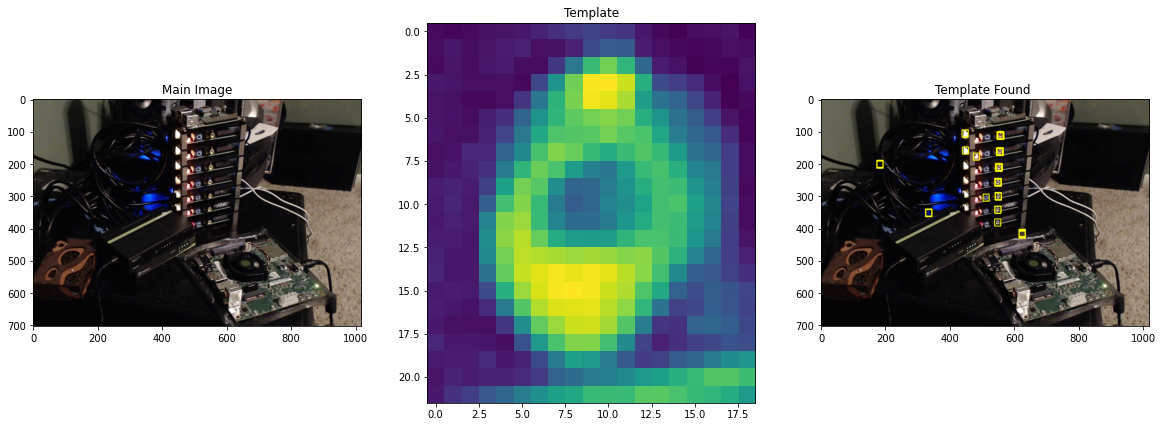

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

#open the main image and convert it to gray scale image
main_image = cv2.imread('Images/test_image.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
main_image_copy = np.copy(main_image)
gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

#open the template as gray scale image
template = cv2.imread('Images/test_template.jpg', 0)

#get the width and height
w, h = template.shape[::-1] 

#match the template using cv2.matchTemplate
# cv.matchTemplate(image, templ, method, result, mask)
match = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.7
# get the location of template in the image
loc = np.where(match >= threshold) 

#draw the rectangle around the matched template
for point in zip(*loc[::-1]): 
    cv2.rectangle(main_image_copy, point, (point[0] + w, point[1] + h), (255,255,0), 2)
    
# cv2.imshow('Template Found', main_image_copy)
# cv2.waitKey(0)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(main_image)
ax2.set_title('Template')
ax2.imshow(template)
ax3.set_title('Template Found ')
ax3.imshow(main_image_copy)

### 2. Multiscaling mechanism in Template Matching

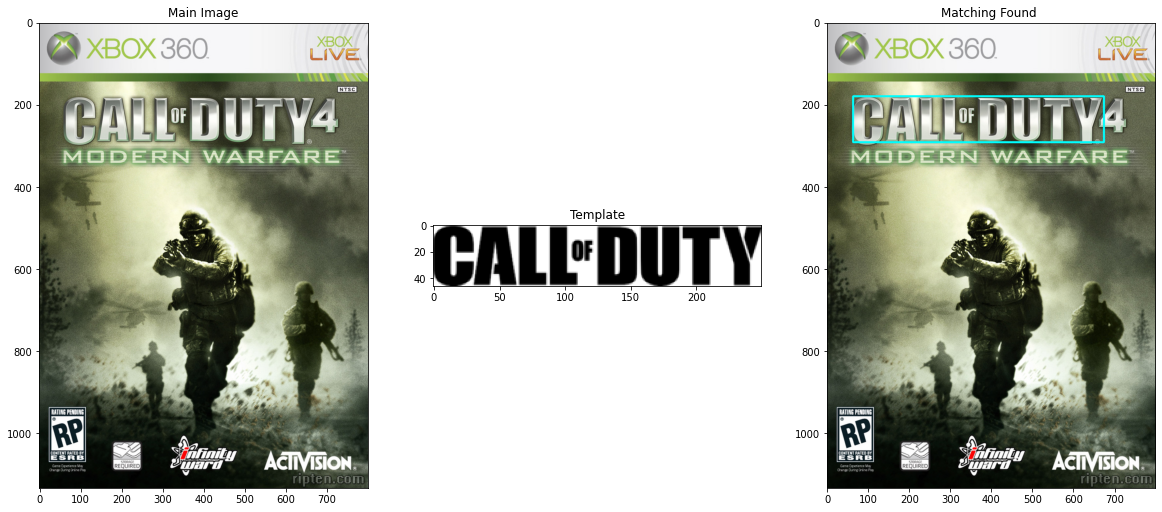

In [5]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline

# Load the image template
main_template = cv2.imread("Images/cod_logo.png")
main_template = cv2.cvtColor(main_template, cv2.COLOR_BGR2RGB)

# Convert it to grayscale
template = cv2.cvtColor(main_template, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
template = cv2.Canny(template, 50, 200)

# Determine width and height
(tH, tW) = template.shape[:2]

# load the image
image = cv2.imread("Images/cod_mw.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert it to grayscale,
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize the bookkeeping variable to keep track of the matched region
found = None

# loop over the multiple scales of the image
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
'''
start: The starting value of the sequence.
stop: The end value of the sequence
num (int): Number of samples to generate. Default is 50. Must be non-negative.
endpoint (bool): If True, stop is the last sample. Otherwise, it is not included. Default is True.
retstep (bool): If True, return (samples, step), where step is the spacing between samples.
dtype: The type of the output array.
axis (int): The axis in the result to store the samples. 
'''
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    # resize(image, width = None, height = None, inter = cv2.INTER_AREA)
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    # v.matchTemplate(image, templ, method, result, mask)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    # minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(src, mask)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    # if we have found a new maximum correlation value, then ipdate
    # the bookkeeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

image_copy = np.copy(image) 
# draw a bounding box around the detected result and display the image
cv2.rectangle(image_copy, (startX, startY), (endX, endY), (0, 255, 255), 4)
cv2.imshow("Image", image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(image)
ax2.set_title('Template')
ax2.imshow(main_template)
ax3.set_title('Matching Found ')
ax3.imshow(image_copy)

### 3. Face Detection

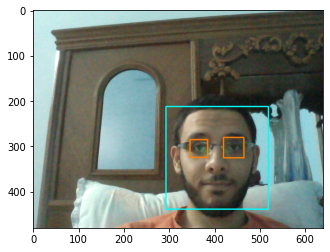

In [9]:
import cv2  
import matplotlib.pyplot as plt  
%matplotlib inline
 
# Load the face cascade
# retval = cv.CascadeClassifier.load(filename)    
face_cascade = cv2.CascadeClassifier('Haarcascad/haarcascade_frontalface_default.xml') 
# retval = cv.CascadeClassifier.load(filename)    
eye_cascade = cv2.CascadeClassifier('Haarcascad/haarcascade_eye.xml')  

# To capture video from webcam. 
# cv2.VideoCapture(index or file_name)
cap = cv2.VideoCapture(0) 
  
# loop runs if capturing has been initialized. 
while True:  
  
    # Read the frame
    # retval, image = cv.VideoCapture.read(image)
    ret, img = cap.read()  
  
    # convert to gray scale of each frames 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
    # Detects faces of different sizes in the input image 
    '''
     scaleFactor : Parameter specifying how much the image size is reduced at each image scale.
     minNeighbors : Parameter specifying how many neighbors each candidate rectangle should have to retain it.
     minSize : Minimum possible object size. Objects smaller than that are ignored.
     maxSize : Maximum possible object size. Objects larger than that are ignored.
    '''
    # detectMultiScale(gray_img, scale_factor, min_neighbors) 
    faces = face_cascade.detectMultiScale(gray, 1.05, 5) 
  
    for (x,y,w,h) in faces: 
        # To draw a rectangle in a face  
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
  
        # Detects eyes of different sizes in the input image 
        eyes = eye_cascade.detectMultiScale(roi_gray)  
  
        #To draw a rectangle in eyes 
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
  
    # Display an image in a window 
    cv2.imshow('img',img) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
        
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows() 

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### 4. Circle Detection

  - Blur Kernel<br/>
  <img src="Images/blurkernel.jpg" align="left"/>

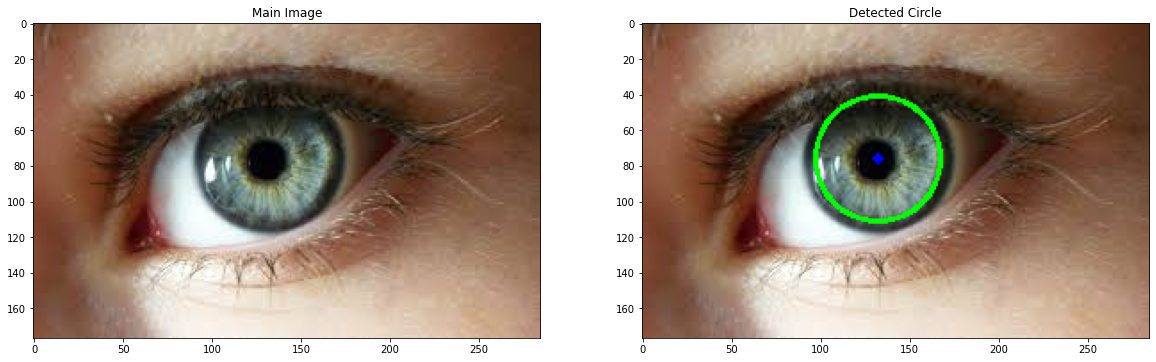

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
  
# Read image. 
img = cv2.imread('Images/eye.jpeg', cv2.IMREAD_COLOR) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_copy = np.copy(img)
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
# cv.blur(src, ksize, dst, anchor, borderType)
'''
src: It is the image whose is to be blurred.
ksize: A tuple representing the blurring kernel size.
anchor: - It is a variable of type integer representing anchor point and it’s default
          value Point is (-1, -1) which means that the anchor is at the kernel center.
        - The anchor point defines how your kernel is positioned with respect to the pixel
          currently processed during the filter operation.
borderType: It depicts what kind of border to be added. 
            It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc
            
            BORDER_CONSTANT: Pad the image with a constant value (i.e. black or 0
            BORDER_REPLICATE: The row or column at the very edge of the original is
                              replicated to the extra border.

Return Value: It returns an image.
'''
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
# cv.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)
'''
image : 8-bit, single-channel, grayscale input image.
method : detection method,the only implemented method is HOUGH_GRADIENT
dp : inverse ratio of the accumulator resolution to the image resolution.
     For example, if dp = 1 , the accumulator has the same resolution as the input image.
     If dp = 2 , the accumulator has half as big width and height.
minDist : minimum distance between the centers of the detected circles.
         If the parameter is too small, multiple neighbor circles may be
         falsely detected in addition to a true one. If it is too large, some circles may be missed.
param1 : first method-specific parameter.
         In case of HOUGH_GRADIENT , it is the higher threshold of the two passed
         to the Canny edge detector (the lower one is twice smaller).
param2 : second method-specific parameter. In case of HOUGH_GRADIENT ,
         it is the accumulator threshold for the circle centers at the detection stage. 
         The smaller it is, the more false circles may be detected.
         Circles, corresponding to the larger accumulator values, will be returned first.
minRadius : minimum circle radius.
maxRadius : maximum circle radius.

Return circles : output vector of found circles(cv.CV_32FC3 type).
                 Each vector is encoded as a 3-element floating-point vector (x,y,radius) .
'''
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 100, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
    
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img_copy, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle ("of radius 1) to show the center. 
        cv2.circle(img_copy, (a, b), 1, (0, 0, 255), 3) 
        
cv2.imshow("Detected Circle", img_copy) 
cv2.waitKey(0) 
cv2.destroyAllWindows()    

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(img)
ax2.set_title('Detected Circle')
ax2.imshow(img_copy)